# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту *ml-teachers* ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #3: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн: 10.11.2017 00:00 OMSK**

#### Полезная литература

- https://matplotlib.org/gallery/index.html
- http://seaborn.pydata.org/examples/index.html

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Задания разминки ( 2 балла)

1) С помощью numpy и matplotlib нарисуйте косинусоиду `np.cos`, логарифм `np.log`, произведение синусоиды на логарифм `np.sin * np.log` и прямую на одном графике (без коэффициентов). Область определения $$x \in [0,10]$$, количество точек должно быть 1000.

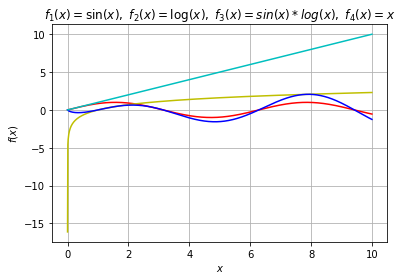

In [2]:
#вместо нуля взяла 0.0000001 поскольку возникала ошибка при подставлении нуля в логарифм
x = np.linspace(0.0000001, 10.0, num=1000)
plt.plot(x, np.sin(x), 'r', x, np.log(x), 'y', x, np.sin(x) * np.log(x), 'b', x, x, 'c')

plt.xlabel(r'$x$') 
plt.ylabel(r'$f(x)$') 
plt.title(r'$f_1(x)=\sin(x),\ f_2(x)=\log(x),\ f_3(x)=sin(x) * log(x),\ f_4(x)=x$')

plt.grid(True)
plt.show()


2) Нарисуйте scatter plot для двух семейств точек:
- первое семейство точек генерируйте из стандартного нормального распределения `np.random.randn` для обеих координат x и y
- второе семейство точек генерируйте из стандарнтого нормального распределения для координаты x и гамма распределения формы 4 `np.random.gamma` для координты y.

Должны получиться два облака точек разного цвета, которые можно мысленно разделить прямой с некоторой погрешностью.

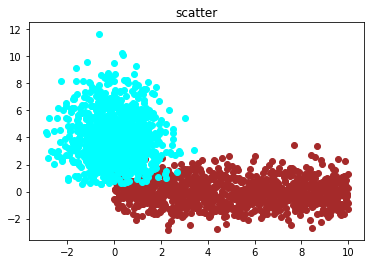

In [3]:
plt.title("scatter")
plt.scatter(x,np.random.randn(len(x)), c='brown')
plt.scatter(np.random.randn(len(x)),np.random.gamma(shape=4, size=len(x)),c='cyan')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Данные лежат в папке `2017-fall/data` https://github.com/7bits/ml-course-7bits/tree/master/2017-fall/data

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [4]:
df = pd.read_csv('data/bikes_rent.csv.gz', compression='gzip')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

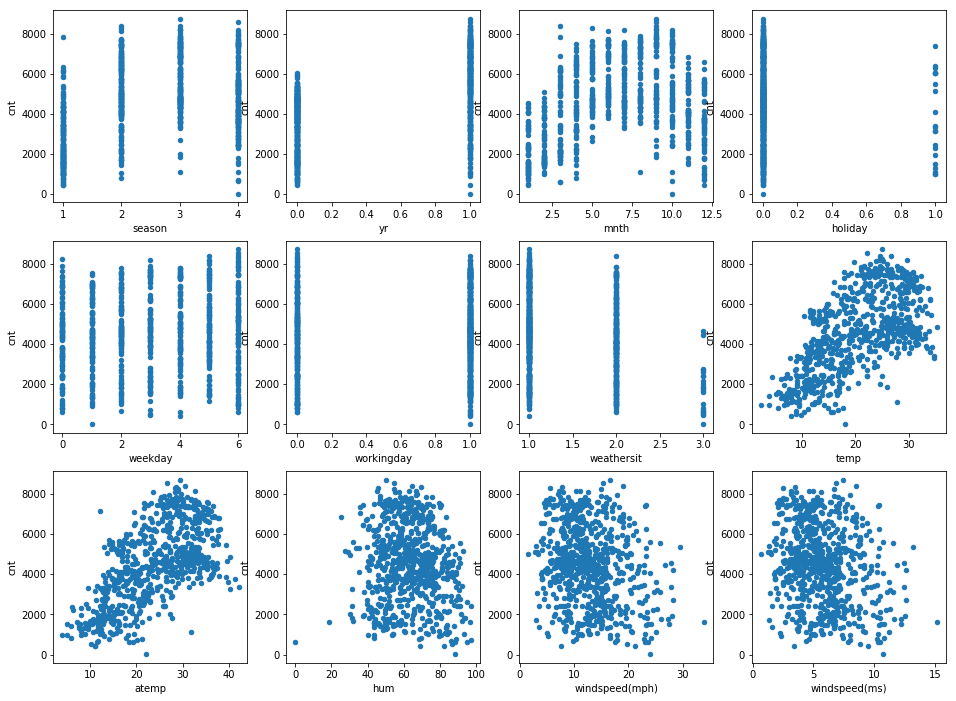

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы (каждый 1 балл):

#### Каков характер зависимости числа прокатов от месяца?

Ответ: Зависимость числа прокатов от месяца не является линейной - в январе число прокатов очень маленькое, затем оно достигает пика в августе-сентябре, а далее снова идёт на спад.

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

Ответ: Скорее всего число прокатов будет зависеть линейно от года (yr)

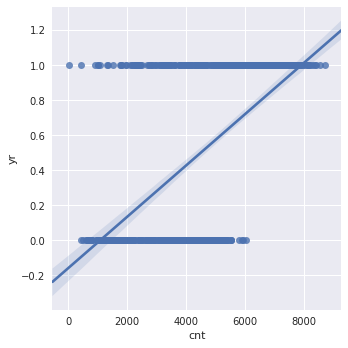

In [7]:
sns.set(color_codes=True)
g = sns.lmplot(x="cnt", y="yr",data=df)
#Не уверена, что верно сделала это, но вроде на графике видно, что в 2012м году количество прокатов 
#существенно увеличилось

## 2. Корреляционная матрица (2 балла)

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: Меньше всего количество прокатов коррелирует с влажностью (hum), номером дня недели (weekday) и признаками, которые указывают рабочий день или нет (workingday) и праздничный или нет (holiday).

Больше всего количество прокатов коррелирует с годом (yr), температурой (temp) и температурой по ощущениям (atemp).  Причем, с этими признаками корреляция положительная, а значит, что чаще всего велосипеды в прокат берут в тёплую погоду, а также, что за год велосипеды стали брать чаще.

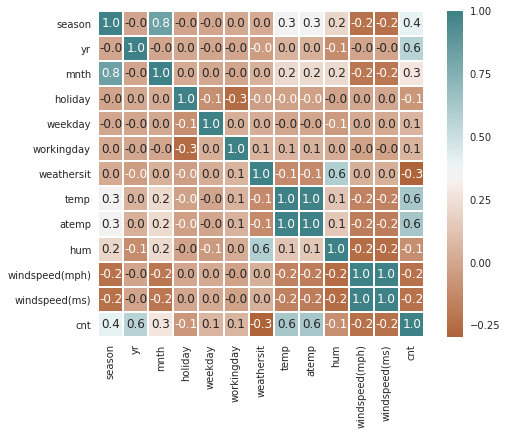

In [8]:
corr = df.corr()
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(30, 200, as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True,linewidths=1, annot=True, fmt=".1f")

## 3. Barpot (2 балла)

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: В 2012м люди стали гораздо чаще брать велосипеды в прокате, соответсвоенно возникла корреляция "увеличивается год - растёт число прокатов". (если честно, не до конца поняла этот вопрос. нужно было из данных понять, почему увеличилось число прокатов?)

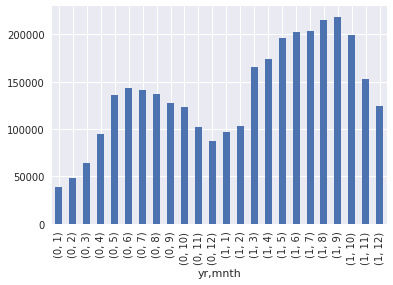

In [9]:
df.groupby(['yr','mnth'])['cnt'].sum().plot(kind='bar')

## 4. Countplot (3 балла)

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: Небольшая разница между столбцами в первом графике всё-таки есть. Это значит, что количество прокатов фиксировалось не каждый день (заметно, что чаще это случалось в понедельник (если 0 это пн, а не вс) и вторник).
    
Ответ: Равномерное

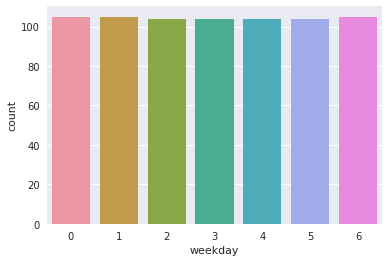

In [10]:
sns.countplot(x='weekday', data=df)

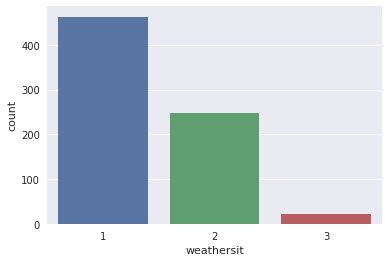

In [11]:
sns.countplot(x='weathersit', data=df)


## 5. Распределение (3 балла)

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: ~4500

Ответ: Рискну предположить, что полимодальное (хотя оно как-то не ярко выражено)

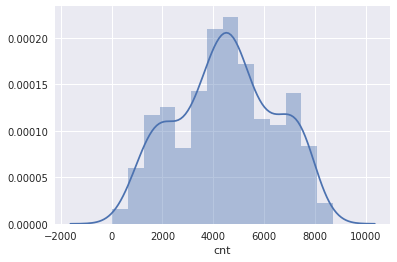

In [12]:
sns.distplot(df['cnt'].dropna())

## 6. Совместное распределение признаков (2 балла)

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: В глаза бросается единственный явный выброс. Чем выше температура воздуха, тем хуже человек определяет её по ощущениям (например, 10 градусов ощущаются как 10, а 35 уже как 40). Больше про график ничего не могу сказать.

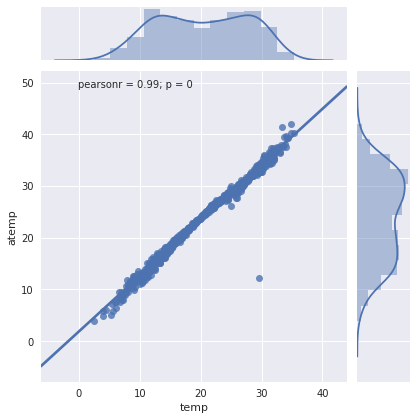

In [13]:
sns.jointplot(df['temp'].dropna(), df['atemp'].dropna(),kind="reg")

## 7. Ящик с усами (2 балла)

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: Это скорее всего зависит от температуры и цели поездки. Например, можно предположить, что в декабре не многим людям хочется устраивать прогулку на велосипеде при низкой температуре воздуха в выходные, а вот в будние дни на работу всё-таки нужно ездить.

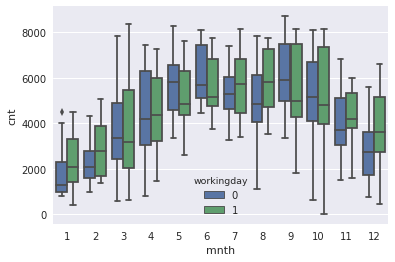

In [14]:
sns.boxplot(x='mnth',y='cnt',hue='workingday', data = df)


## 8*. Со звёздочкой (5 баллов)

Правда ли, что при более сильном ветре человеку ощущается, что на улице холоднее, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: Когда ветер до ~5м/с разница между реальной и ощущаемой температурой наибольшая - достигает 5-6 градусов в среднем, т.е. в этом промежутке ощущаемая температура на 5-6 градусов выше реальной.

Далее заметно смещение точек ближе к нулю по оси у: при более сильном ветре разница температур уменьшается.

Из этого можно сделать вывод о том, что при более сильном ветре разница просто становится менее заметной. Однако при этом человек не ощущает температуру ниже, чем она есть, его ощущения просто становятся ближе к реальности (за -исключением пары случаев).

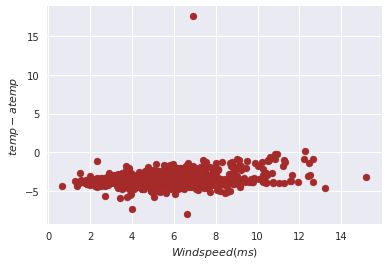

In [15]:
#столбец с разностью температур
df['diff'] = df['temp'] - df['atemp']
plt.grid(True) 
plt.xlabel(r'$Wind speed (ms)$') 
plt.ylabel(r'$temp - atemp$') 
plt.scatter(df['windspeed(ms)'],df['diff'], c='brown')

#положительной разницы нет - температура не ощущается ниже, чем она есть
#чем больше скорость ветра, тем 